In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
time_folder = "24-07-17"
base_folder = "/data3/lsf/Pein/Power-Prediction/output/"

path = base_folder + time_folder + "_result/" + time_folder + "-joined_metrics.csv"
df = pd.read_csv(path)

# Truncate values larger than 3000 to be 3000
df["train_rmse"] = df["train_rmse"].clip(upper=3000)
df["val_rmse"] = df["val_rmse"].clip(upper=3000)
df["test_rmse"] = df["test_rmse"].clip(upper=3000)

# Display the first few rows of the dataframe
print(df.head())

           exp_date  train_rmse  train_custom_acc  val_rmse_for_best_train  \
0  2024-07-17 19:55   217.49643         23.854031                484.58490   
1  2024-07-17 16:53   195.33469        -34.438393                443.44894   
2  2024-07-17 11:29   510.54456       -410.663849                601.71810   
3  2024-07-17 20:17   262.43396         21.357405                468.53348   
4  2024-07-17 19:40   193.52930         42.393635                456.50455   

   val_custom_acc_for_best_train  test_rmse_for_best_train  \
0                     -65.633011                 423.24905   
1                    -209.443115                 433.49850   
2                            NaN                 807.33260   
3                     -41.493355                 396.59210   
4                     -60.209717                 429.99830   

   test_custom_acc_for_best_train  train_epoch_for_best_train   val_rmse  \
0                      -57.284321                           8  501.21558   
1     

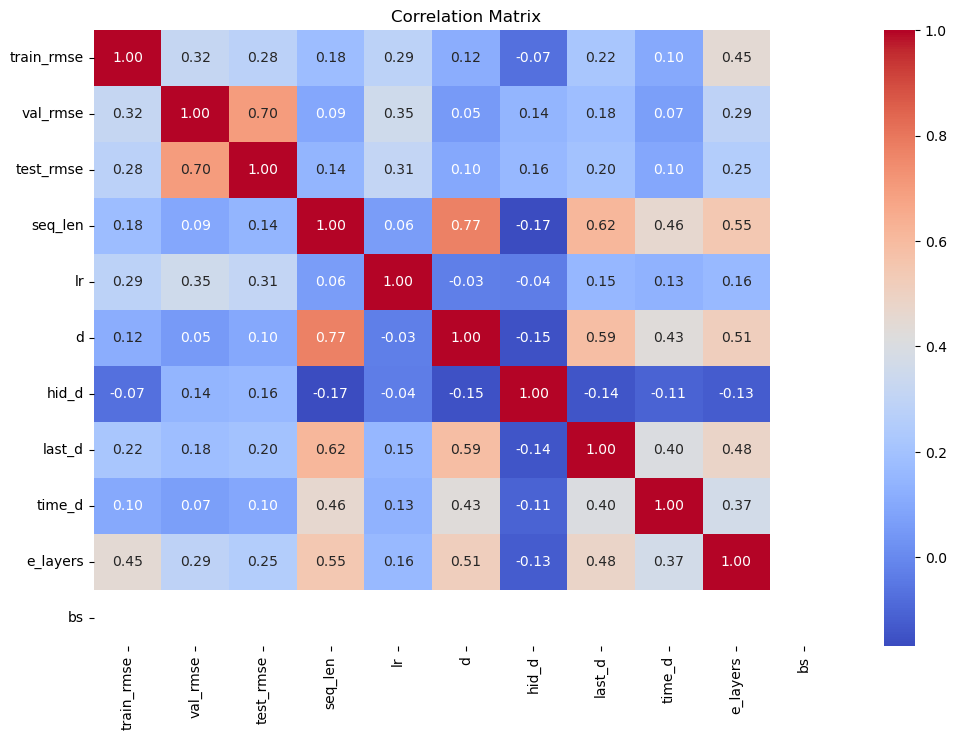

In [3]:
# Correlation matrix
corr_matrix = df[
    [
        "train_rmse",
        "val_rmse",
        "test_rmse",
        "seq_len",
        "lr",
        "d",
        "hid_d",
        "last_d",
        "time_d",
        "e_layers",
        "bs",
    ]
].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [4]:
# # Pairplot to visualize relationships
# sns.pairplot(
#     df[
#         [
#             "train_rmse",
#             "val_rmse",
#             "test_rmse",
#             "seq_len",
#             "lr",
#             "d",
#             "hid_d",
#             "last_d",
#             "time_d",
#             "e_layers",
#             "bs",
#         ]
#     ]
# )
# plt.show()

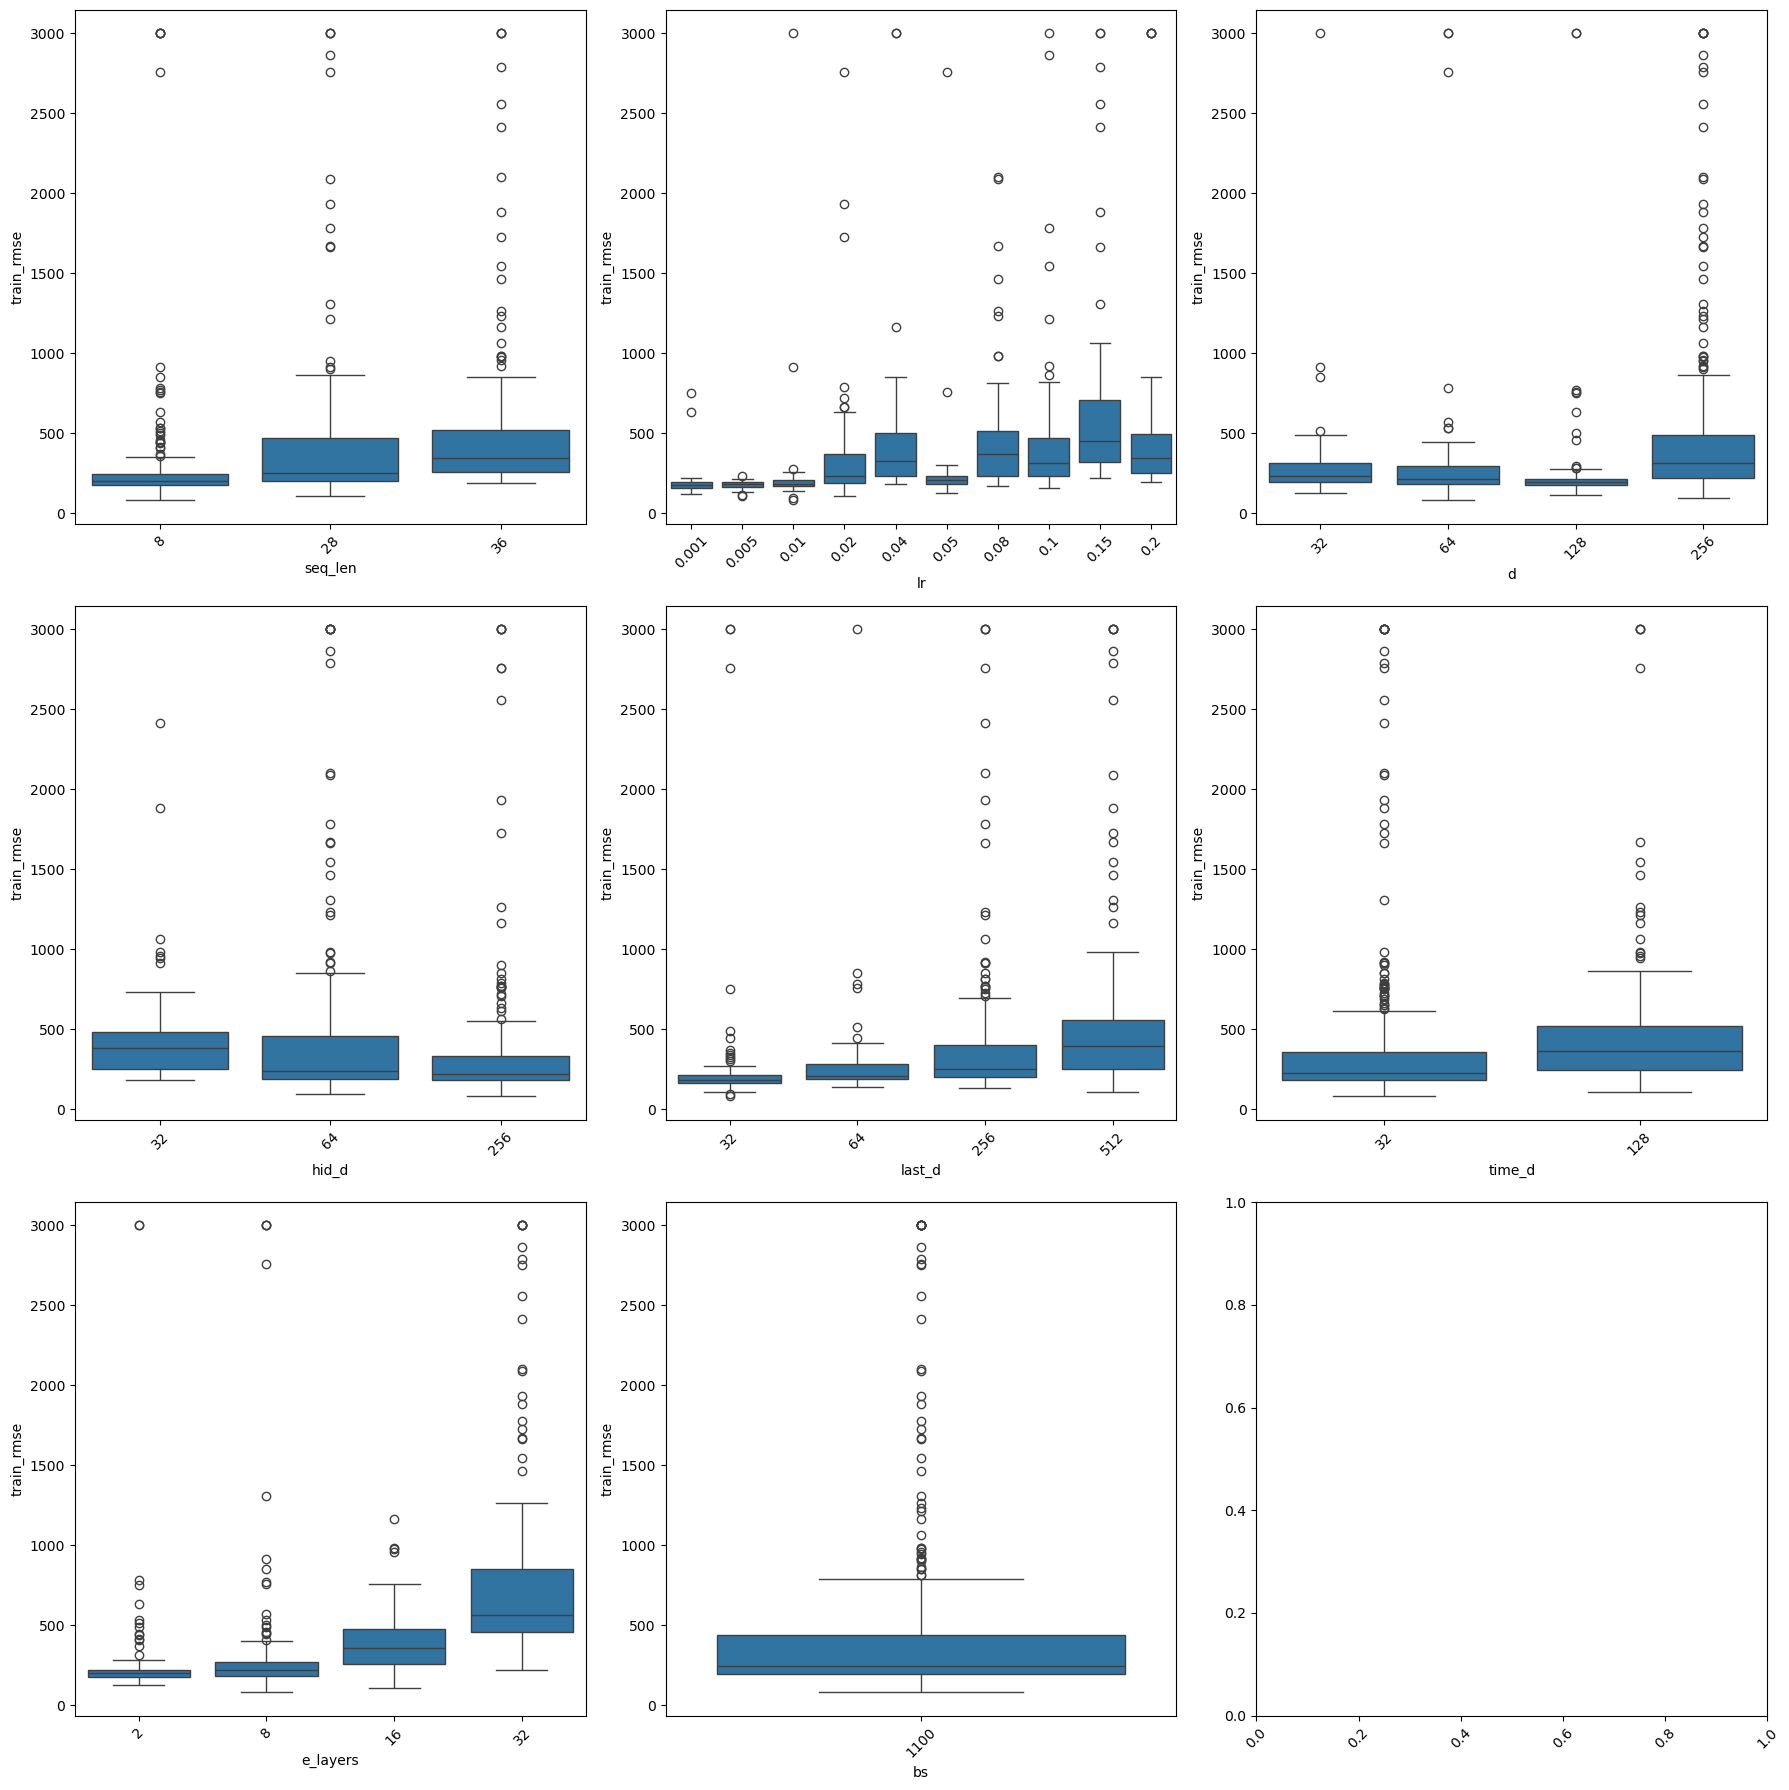

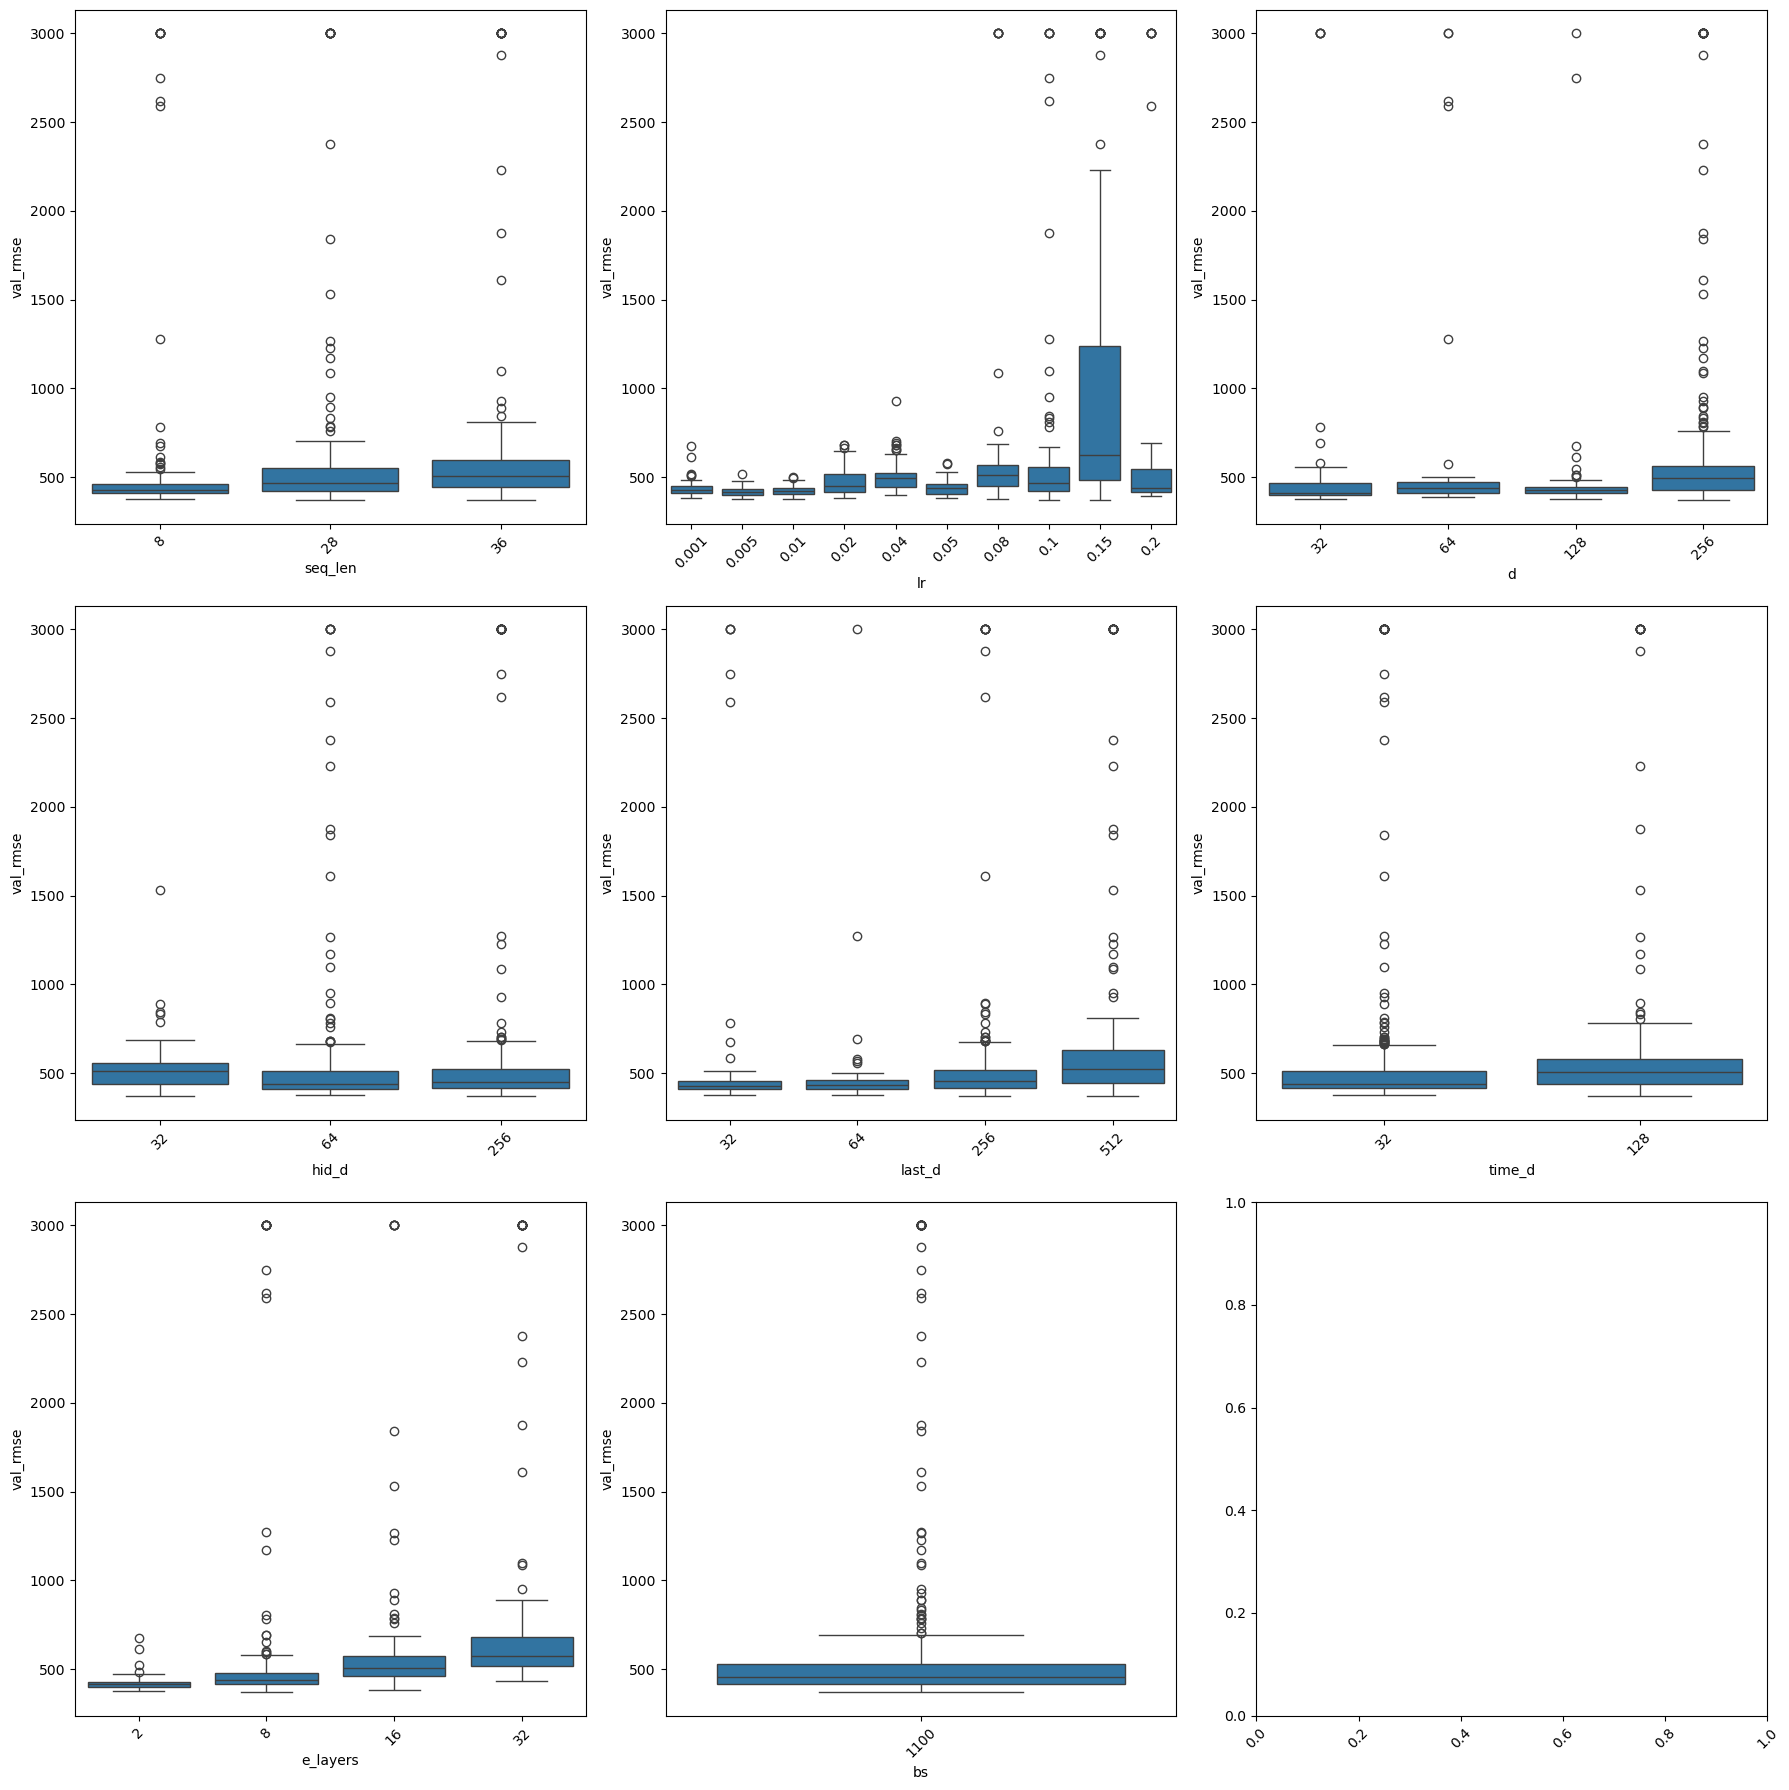

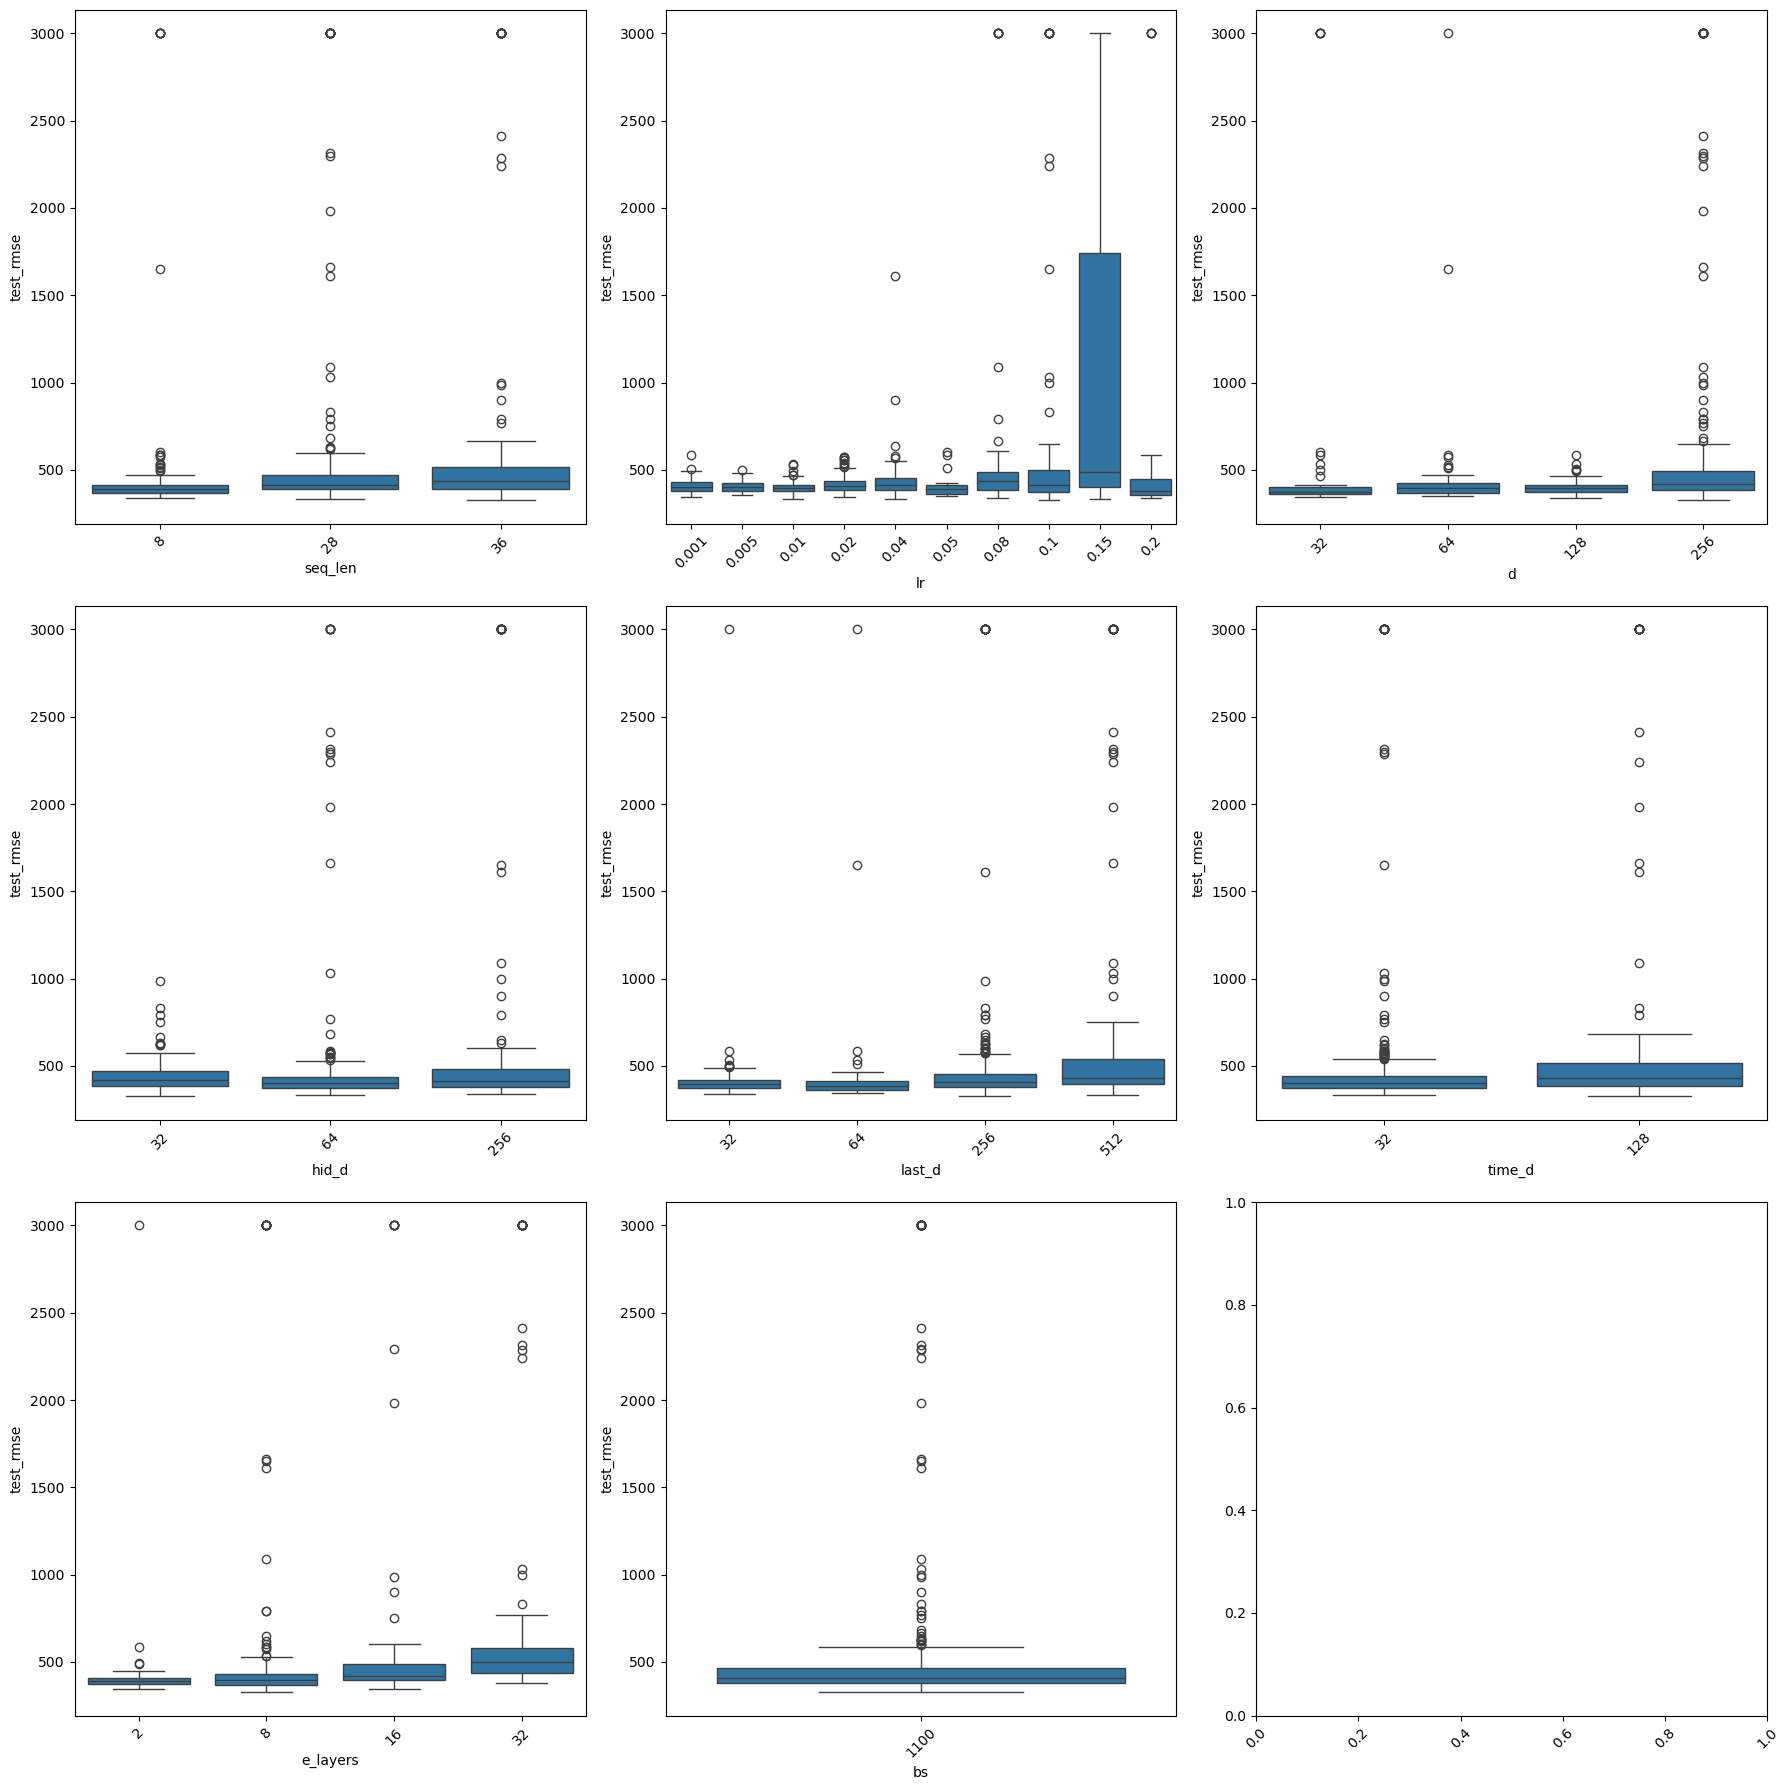

In [5]:
# Analyzing the effect of each setting on RMSEs
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# Plotting
sns.boxplot(ax=axes[0, 0], x="seq_len", y="train_rmse", data=df)
sns.boxplot(ax=axes[0, 1], x="lr", y="train_rmse", data=df)
sns.boxplot(ax=axes[0, 2], x="d", y="train_rmse", data=df)
sns.boxplot(ax=axes[1, 0], x="hid_d", y="train_rmse", data=df)
sns.boxplot(ax=axes[1, 1], x="last_d", y="train_rmse", data=df)
sns.boxplot(ax=axes[1, 2], x="time_d", y="train_rmse", data=df)
sns.boxplot(ax=axes[2, 0], x="e_layers", y="train_rmse", data=df)
sns.boxplot(ax=axes[2, 1], x="bs", y="train_rmse", data=df)

for ax in axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

# Repeat for val_rmse and test_rmse
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

sns.boxplot(ax=axes[0, 0], x="seq_len", y="val_rmse", data=df)
sns.boxplot(ax=axes[0, 1], x="lr", y="val_rmse", data=df)
sns.boxplot(ax=axes[0, 2], x="d", y="val_rmse", data=df)
sns.boxplot(ax=axes[1, 0], x="hid_d", y="val_rmse", data=df)
sns.boxplot(ax=axes[1, 1], x="last_d", y="val_rmse", data=df)
sns.boxplot(ax=axes[1, 2], x="time_d", y="val_rmse", data=df)
sns.boxplot(ax=axes[2, 0], x="e_layers", y="val_rmse", data=df)
sns.boxplot(ax=axes[2, 1], x="bs", y="val_rmse", data=df)

for ax in axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(3, 3, figsize=(18, 18))

sns.boxplot(ax=axes[0, 0], x="seq_len", y="test_rmse", data=df)
sns.boxplot(ax=axes[0, 1], x="lr", y="test_rmse", data=df)
sns.boxplot(ax=axes[0, 2], x="d", y="test_rmse", data=df)
sns.boxplot(ax=axes[1, 0], x="hid_d", y="test_rmse", data=df)
sns.boxplot(ax=axes[1, 1], x="last_d", y="test_rmse", data=df)
sns.boxplot(ax=axes[1, 2], x="time_d", y="test_rmse", data=df)
sns.boxplot(ax=axes[2, 0], x="e_layers", y="test_rmse", data=df)
sns.boxplot(ax=axes[2, 1], x="bs", y="test_rmse", data=df)

for ax in axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

plt.tight_layout()
plt.show()

In [6]:
# Calculate the sum of rmse values for each row
df["sum_rmse"] = df["train_rmse"] + df["val_rmse"] + df["test_rmse"]

# Sort the rows based on the sum of rmse values
sorted_df = df.sort_values(by="test_rmse")

# Print the top rows with the minimal sum of rmse
top_n = 10  # Number of top rows to print


# Drop the specified columns
columns_to_drop = [
    "train_custom_acc_for_best_val",
    "train_custom_acc",
    "val_custom_acc",
    "test_custom_acc",
    "train_custom_acc_for_best_test",
    "val_custom_acc_for_best_train",
    "val_custom_acc_for_best_test",
    "test_custom_acc_for_best_train",
    "test_custom_acc_for_best_val",
]

# Print the top rows with the minimal sum of rmse
print(sorted_df.head(top_n).drop(columns=columns_to_drop))

             exp_date  train_rmse  val_rmse_for_best_train  \
398  2024-07-17 18:22   231.27730                429.19806   
172  2024-07-17 17:01   203.75984                447.02220   
434  2024-07-17 18:05   306.54517                507.99582   
517  2024-07-17 18:54   284.31020                410.15164   
216  2024-07-17 18:20   290.14255                422.84390   
249  2024-07-17 19:44   232.79622                412.14023   
267  2024-07-17 19:05   265.80770                392.49057   
500  2024-07-17 12:15   238.83134                461.28010   
555  2024-07-17 20:44   247.27924                438.32104   
26   2024-07-17 18:53   217.37021                422.17715   

     test_rmse_for_best_train  train_epoch_for_best_train   val_rmse  \
398                 374.83680                           9  372.59230   
172                 410.51694                           6  409.93710   
434                 520.06630                           8  436.96720   
517                 374.64062